In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("vgsales.csv")
print(data.head())

   Rank             Name Platform  Year     Genre   Publisher  NA_Sales  \
0   259        Asteroids     2600  1980   Shooter       Atari      4.00   
1   545  Missile Command     2600  1980   Shooter       Atari      2.56   
2  1768          Kaboom!     2600  1980      Misc  Activision      1.07   
3  1971         Defender     2600  1980      Misc       Atari      0.99   
4  2671           Boxing     2600  1980  Fighting  Activision      0.72   

   EU_Sales  JP_Sales  Other_Sales  Global_Sales  
0      0.26       0.0         0.05          4.31  
1      0.17       0.0         0.03          2.76  
2      0.07       0.0         0.01          1.15  
3      0.05       0.0         0.01          1.05  
4      0.04       0.0         0.01          0.77  


In [3]:
print(data.isnull().sum())

Rank             0
Name             0
Platform         0
Year             0
Genre            0
Publisher       36
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
Global_Sales     0
dtype: int64


In [4]:
data = data.dropna()

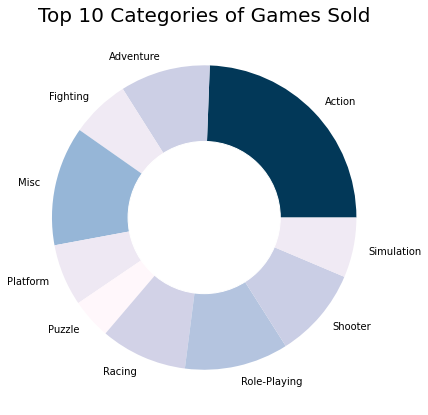

In [5]:
import matplotlib as mpl
game = data.groupby("Genre")["Global_Sales"].count().head(10)
custom_colors = mpl.colors.Normalize(vmin=min(game), vmax=max(game))
colours = [mpl.cm.PuBu(custom_colors(i)) for i in game]
plt.figure(figsize=(7,7))
plt.pie(game, labels=game.index, colors=colours)
central_circle = plt.Circle((0, 0), 0.5, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Top 10 Categories of Games Sold", fontsize=20)
plt.show()

                  Rank      Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales  \
Rank          1.000000  0.177655 -0.400317 -0.379143 -0.269326    -0.332739   
Year          0.177655  1.000000 -0.091233  0.006236 -0.169391     0.041248   
NA_Sales     -0.400317 -0.091233  1.000000  0.768919  0.451278     0.634513   
EU_Sales     -0.379143  0.006236  0.768919  1.000000  0.436373     0.726253   
JP_Sales     -0.269326 -0.169391  0.451278  0.436373  1.000000     0.290553   
Other_Sales  -0.332739  0.041248  0.634513  0.726253  0.290553     1.000000   
Global_Sales -0.426979 -0.074565  0.941268  0.903262  0.612770     0.747960   

              Global_Sales  
Rank             -0.426979  
Year             -0.074565  
NA_Sales          0.941268  
EU_Sales          0.903262  
JP_Sales          0.612770  
Other_Sales       0.747960  
Global_Sales      1.000000  


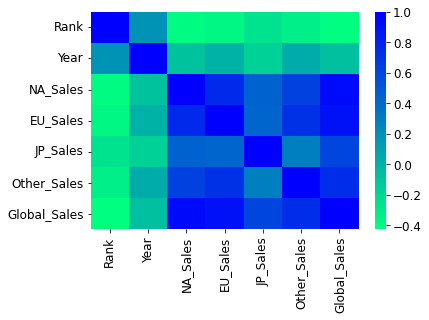

In [6]:
print(data.corr())
sns.heatmap(data.corr(), cmap="winter_r")
plt.show()

# Training Video Game Sales Prediction Model

In [7]:
x = data[["Rank", "NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]]
y = data["Global_Sales"]

In [8]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)